# **UNSUPERVISED LEARNING (CLUSTERING)**

⭐ Unsupervised Clustering of data on customer records from a shopping mall database ⭐

**Objetive:**

Divide customers into segments to optimize the importance of each customer to the company, modify products according to different customer needs and behaviors, and help the company understand its different types of customers

**Columns:**

- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in customer's household
- **Teenhome:** Number of teenagers in customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

- **MntWines:** Amount spent on wine in last 2 years
- **MntFruits:** Amount spent on fruits in last 2 years
- **MntMeatProducts:** Amount spent on meat in last 2 years
- **MntFishProducts:** Amount spent on fish in last 2 years
- **MntSweetProducts:** Amount spent on sweets in last 2 years
- **MntGoldProds:** Amount spent on gold in last 2 years

- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign
- **Response:** 1 if customer accepted the offer in the last campaign

- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalogue
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to company’s website in the last month

## **Predefined Functions**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [3]:
def inspect_data(df):
    printmd('Data Shape')
    print(df.shape)
    print('\n')
    printmd('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    printmd('Data Types: ')
    print(df.dtypes)

In [4]:
def plottingRegressComparison(yreal,ypred):

    comparison = pd.DataFrame({"yreal":yreal, "ypred":ypred})

    i=min(ypred)
    comparison["line"] = [i+j*max(yreal)/len(comparison) for j in range(len(comparison))]
    comparison["line2"] = comparison["line"]

    fig, ax = plt.subplots(figsize=(8,8))
    comparison.plot(x="line", y="line2", ax=ax, color="red", marker="*", markersize=2)
    comparison.plot.scatter(x="yreal", y="ypred", ax=ax)
    ax.grid(True)
    ax.set_yticklabels(ax.get_yticks(minor=False), fontname='Serif', fontsize=10)
    ax.set_xticklabels(ax.get_xticks(minor=False), fontname='Serif', fontsize=10)
    ax.set_ylabel("Ventas predichas", fontname='Serif', fontsize=10)
    ax.set_xlabel("Ventas reales", fontname='Serif', fontsize=10)
    ax.set_title("Ventas reales VS Ventas predichas", fontname='Serif', fontsize=10)
    ax.get_legend().remove()

In [5]:
def plottingResults(yreal,ypred):
    # Creamos
    comparison = pd.DataFrame({"yreal":yreal, "ypred":ypred})
    comparison["diff"] = comparison["yreal"] - comparison["ypred"]

    fig, ax = plt.subplots(figsize=(8,8))
    comparison["diff"].hist(bins=100, ax=ax)
    ax.set_xticklabels(ax.get_xticks(),fontsize=10, rotation=45)
    ax.set_yticklabels(ax.get_yticks(),fontsize=10)
    ax.set_xlabel("Error", fontname='Serif', fontsize=10)
    ax.set_title("Histograma del error de predicción", fontname='Serif', fontsize=16)

## **Preprocessing Functions**

### Missing data

In [6]:
def meanValueImputation(data, feature):

    valor_medio = data[feature].mean()

    data[feature].fillna(valor_medio, inplace=True)

In [7]:
from scipy import stats
def modeValueImputation(data, feature):

    valor_moda = stats.mode(data[feature])[0][0]

    data[feature].fillna(valor_moda, inplace=True)

In [8]:
def mostCommonValueImputation(data, feature):

    valor_mas_comun = data[feature].mode()[0]

    data[feature].fillna(valor_mas_comun, inplace=True)

### Outliers

In [9]:
def statisticalOutlierDetection(data, feature, thresholdmin=None,thresholdmax=None, drop=False):

  if thresholdmax:
    print("dentro")
    data_clean = data.drop(data[data[feature]>=thresholdmax].index)
  else:
    data_clean = data.copy()

  if thresholdmin:
    data_clean = data_clean.drop(data_clean[data_clean[feature]<=thresholdmin].index)
  else:
    data_clean = data_clean.copy()

  data_clean.reset_index(drop=True, inplace=True)

  print("Se han eliminado : {} instancias.".format(len(data)-len(data_clean)))
  print(data_clean.shape)

  if drop==True:
    return data_clean
  else:
    return data

In [10]:
def modelOutlierDetection(data, nf, n = 20, drop = False):

  from sklearn.neighbors import LocalOutlierFactor

  clf = LocalOutlierFactor(n_neighbors=n)
  y_pred = clf.fit_predict(np.array(nf))

  data_clean = data.copy()
  data_clean["outliers"] = y_pred
  data_clean.drop(data_clean[data_clean["outliers"]<0].index, inplace=True)
  data_clean.drop("outliers", axis=1, inplace=True)
  data_clean.reset_index(drop=True, inplace=True)
  print("Se han eliminado : {} instancias.".format(len(data)-len(data_clean)))

  if drop:
    return  data_clean
  else:
    return data

### Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
def labelEncoding(data, categorical_features):

  le = LabelEncoder()
  data_cod = data.copy()
  for col in categorical_features.columns:
      data_cod[col+"_cod"]=le.fit_transform(np.array(data_cod[col]))

  data_cod = data_cod.drop(categorical_features.columns, axis=1)

  return data_cod

In [12]:
from sklearn.preprocessing import OneHotEncoder
def OHEncoding(data, categorical_features):
  ohe = OneHotEncoder()
  data_cod = data.copy()
  for col in categorical_features.columns:

    X = np.array(data_cod[[col]])

    ohe.fit(X)
    Xohe = ohe.transform(X).toarray()

    dataohe = pd.DataFrame(Xohe, columns=data_cod[col].drop_duplicates().tolist())
    data_cod = pd.concat([data_cod,dataohe], axis=1)

  data_cod = data_cod.drop(categorical_features.columns, axis=1)

  return data_cod

In [13]:
!pip install category_encoders
import category_encoders as ce
def binaryEncoding(data, categorical_features):

  data_cod = data.copy()

  encoder = ce.BinaryEncoder(cols=categorical_features)
  data_cod = encoder.fit_transform(data_cod)
  data_cod

  return data_cod

### Scalers

In [14]:
#MinMaxScaler

"""
scalers = {}
inf = {}

for i in data_cod.columns:
    minmax = MinMaxScaler()
    scalers[i+"scl"] = minmax.fit(data_cod[[i]])
    inf[i+"scl"] = minmax.transform(data_cod[[i]]).reshape(-1) #se transforman los datos de la columna utilizando el MinMaxScaler (minmax.transform), y se aplana el resultado usando reshape(-1)

    data_scl = pd.DataFrame(inf)

data_scl.head()
"""

'\nscalers = {}\ninf = {}\n\nfor i in data_cod.columns:\n    minmax = MinMaxScaler()\n    scalers[i+"scl"] = minmax.fit(data_cod[[i]])\n    inf[i+"scl"] = minmax.transform(data_cod[[i]]).reshape(-1) #se transforman los datos de la columna utilizando el MinMaxScaler (minmax.transform), y se aplana el resultado usando reshape(-1)\n\n    data_scl = pd.DataFrame(inf)\n\ndata_scl.head()\n'

In [15]:
#StandardScaler

"""
scalers = {}
inf = {}
for i in data_cod.columns:
  std_scaler = StandardScaler()
  scalers[i+"scl"] = std_scaler.fit(data_cod[[i]])#.reshape(-1)
  inf[i+"scl"] = std_scaler.transform(data_cod[[i]]).reshape(-1)

data_scl = pd.DataFrame(inf)

data_scl.head()
"""

'\nscalers = {}\ninf = {}\nfor i in data_cod.columns:\n  std_scaler = StandardScaler()\n  scalers[i+"scl"] = std_scaler.fit(data_cod[[i]])#.reshape(-1)\n  inf[i+"scl"] = std_scaler.transform(data_cod[[i]]).reshape(-1)\n\ndata_scl = pd.DataFrame(inf)\n\ndata_scl.head()\n'

### -------------------

## **Data Upload and Preview**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [17]:
df = pd.read_csv("data/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## **First Analysis**

In [18]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [19]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [20]:
columns = df.columns
columns.unique()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Transform Columns for Greater Clarity

- ID

In [21]:
df = df.drop('ID', axis=1)

- Year_Birth

In [22]:
df["Age"] = 2024-df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

- Kidhome, Teenhome

In [23]:
df["Children"] = df['Kidhome'] + df['Teenhome']
df = df.drop('Kidhome', axis=1)
df = df.drop('Teenhome', axis=1)

- Group MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

In [24]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

## **Analysis of Each Variable**

- Categorical Variables:

In [25]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.head(2)

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single


In [26]:
categorical_features.apply(lambda x : len(x.unique()))

Education         5
Marital_Status    8
dtype: int64

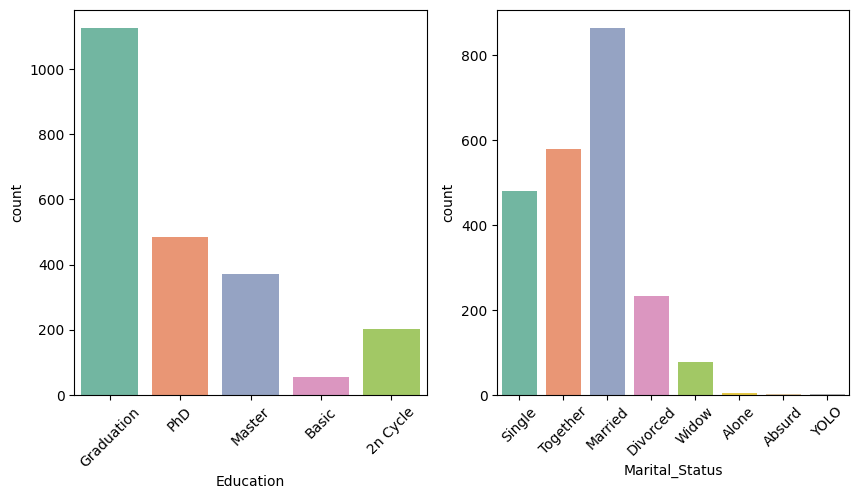

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
catdata = categorical_features.columns
for col, ax in zip(catdata, axs.ravel()):
    sns.countplot(x=col,data=df,palette='Set2',ax=ax)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

**Group Alone, Absurd, Yolo (Irrelevant)**

In [28]:
df['Marital_Status'] = df['Marital_Status'].replace({'Alone':'Single', 'Absurd':'Single', 'YOLO':'Single'})

- Numerical Variables

In [29]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.head(2)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,0,3,11,1,67,0,1617
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,0,3,11,0,70,2,27


In [30]:
numerical_features.apply(lambda x : len(x.unique()))

Income                 1975
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Age                      59
Children                  4
Spent                  1054
dtype: int64

**Drop Unique Columns --> Z_CostContact, Z_Revenue**

In [31]:
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)
numerical_features = df.select_dtypes(include=[np.number])

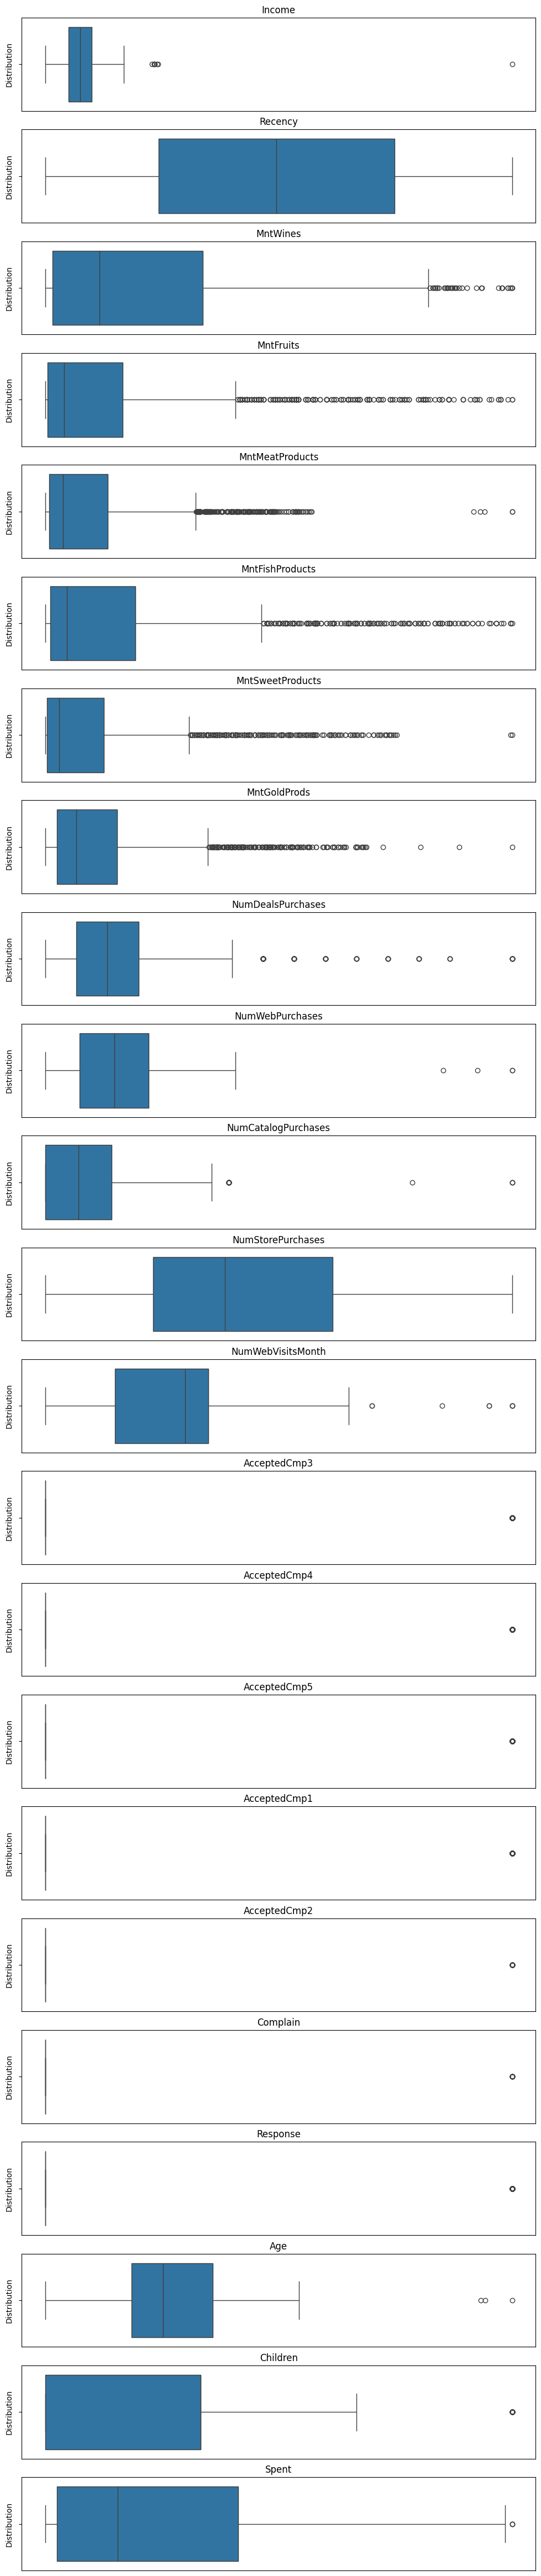

In [32]:
cols = numerical_features.columns
fig, axs = plt.subplots(len(cols),1,figsize=(12,60))

for col, ax in zip(cols, axs.ravel()):
  sns.boxplot(x=col, data=numerical_features, ax=ax)
  ax.set_ylabel("Distribution")
  ax.get_xaxis().set_visible(False)
  ax.set_title(col)

In [33]:
pd.set_option('display.max_columns', 29)

numerical_features.describe(include='all')

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Spent
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,0.950446,605.798214
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.751803,602.249288
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,68.750000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,396.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1.000000,1045.500000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,3.000000,2525.000000


**I delete the columns that have constant data,** when the 75% of the instances are the same (0):

--> AcceptedCmp3, AcceptedCmp4,	AcceptedCmp5,	AcceptedCmp1,	AcceptedCmp2,	Complain,	Response

In [34]:
drop_columns = ['AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',
'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Response']
numerical_features = numerical_features.drop(drop_columns, axis=1)

In [35]:
correlacion_pearson = numerical_features.corr(method='pearson')
correlacion_pearson

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Spent
Income,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.161791,-0.293352,0.667576
Recency,-0.003970,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.019871,0.018053,0.020433
MntWines,0.578650,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.157773,-0.351909,0.891839
MntFruits,0.430842,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.017917,-0.394853,0.614229
MntMeatProducts,0.584633,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.030872,-0.502208,0.842965
MntFishProducts,0.438871,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.041625,-0.425503,0.642818
MntSweetProducts,0.440744,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294,0.018133,-0.383137,0.603016
MntGoldProds,0.325916,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.049085,0.421836,0.437697,0.381678,-0.250719,0.061818,-0.266095,0.524262
NumDealsPurchases,-0.083101,-0.001098,0.010940,-0.132114,-0.122415,-0.139361,-0.120100,0.049085,1.000000,0.234185,-0.008617,0.068879,0.347633,0.060846,0.439684,-0.065112
NumWebPurchases,0.387878,-0.010726,0.542265,0.296735,0.293761,0.293681,0.348544,0.421836,0.234185,1.000000,0.378376,0.502713,-0.055846,0.145040,-0.146361,0.519837


In [36]:
umbral = 0.5
columnas_altamente_correlacionadas = set()

for i in range(len(correlacion_pearson.columns)):
    for j in range(i):
        if abs(correlacion_pearson.iloc[i, j]) > umbral:
            colname = correlacion_pearson.columns[i]
            columnas_altamente_correlacionadas.add(colname)

columnas_altamente_correlacionadas

{'Children',
 'MntFishProducts',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntWines',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebPurchases',
 'NumWebVisitsMonth',
 'Spent'}

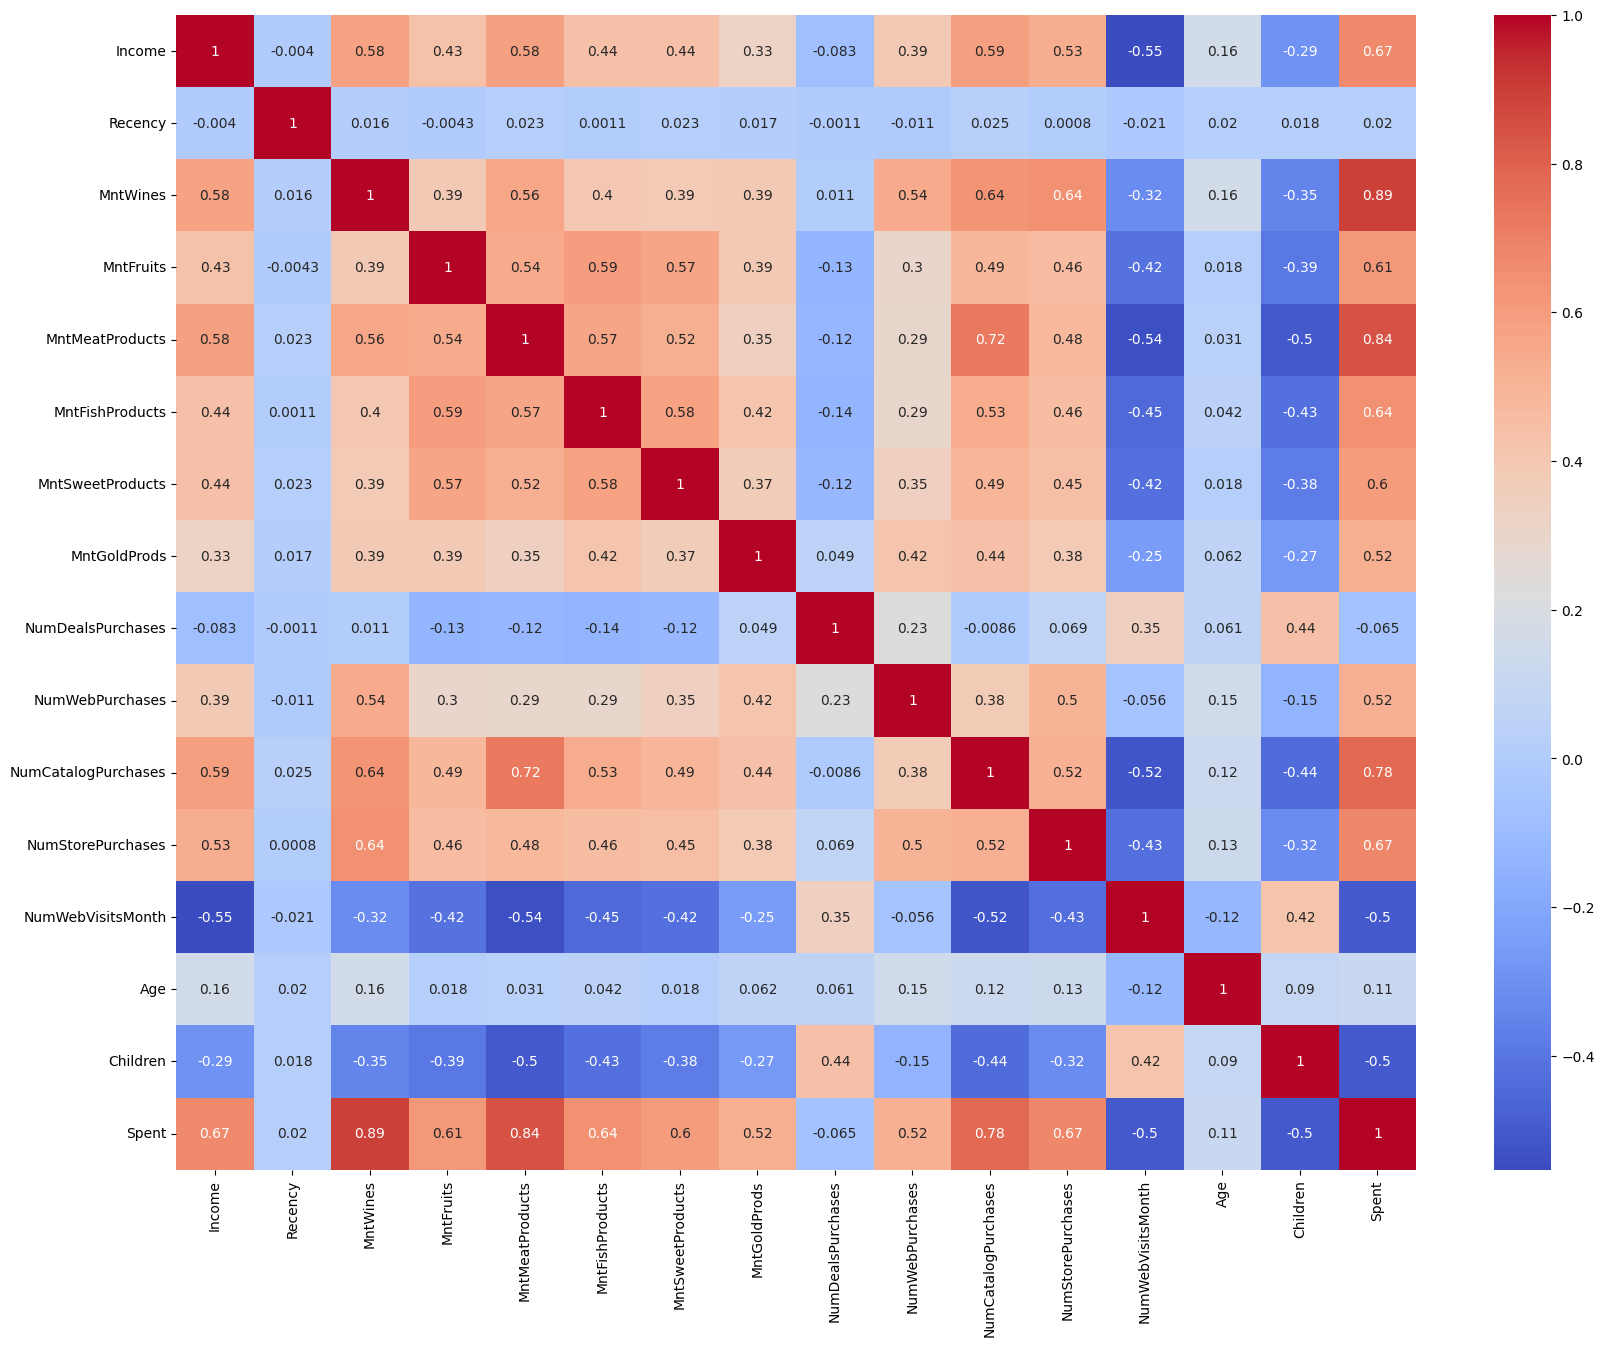

In [37]:
matriz_correlacion = numerical_features.corr()
plt.figure(figsize=(20, 15))

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()

**Adjust** the age and income column

In [38]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<100000)]
print("Values after removing outliers:", len(df))

Values after removing outliers: 2200


## **Final DataFrame**

In [39]:
df = pd.concat([categorical_features, numerical_features], axis=1)
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Spent
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,67,0,1617
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,70,2,27
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,59,0,776
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,40,1,53
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,43,1,422


## **First Modeling**

### Null Values


In [40]:
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Age                     0
Children                0
Spent                   0
dtype: int64

In [41]:
len(df)

2240

There are hardly any null values, I eliminate them with the average value of the column.

In [42]:
mostCommonValueImputation(df, 'Income')

### Outliers

We use the density-based method **LocalOutlierFactor**.

In [43]:
data_clean = df.copy()

In [44]:
numerical_features = data_clean.select_dtypes(include=[np.number])
data_clean = modelOutlierDetection(data_clean, numerical_features, n = 1000, drop = False)

Se han eliminado : 77 instancias.


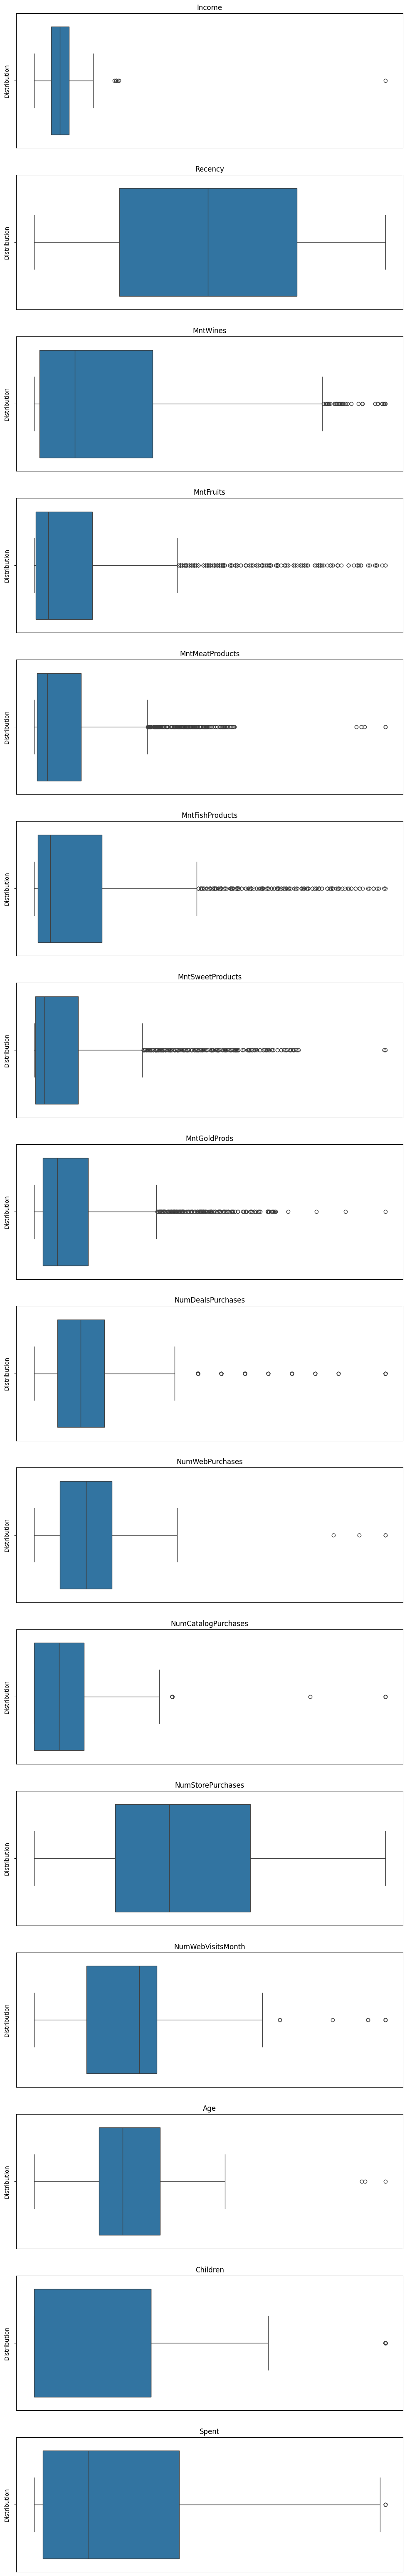

In [45]:
cols = numerical_features.columns
fig, axs = plt.subplots(len(cols),1,figsize=(12,80))

for col, ax in zip(cols, axs.ravel()):
  sns.boxplot(x=col, data=numerical_features, ax=ax)
  ax.set_ylabel("Distribution")
  ax.get_xaxis().set_visible(False)
  ax.set_title(col)

### Encoding

La codificación más adecuada es aquella que no crea demasiadas **variables nuevas (Dimensiones)**

In [46]:
data_clean.dtypes

Education               object
Marital_Status          object
Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Age                      int64
Children                 int64
Spent                    int64
dtype: object

In [47]:
categorical_features = data_clean.select_dtypes(include=[object])

In [48]:
#data_cod = binaryEncoding(data_clean, categorical_features)

In [49]:
data_cod = labelEncoding(data_clean, categorical_features)

In [50]:
data_cod.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Spent,Education_cod,Marital_Status_cod
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,67,0,1617,2,4
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,70,2,27,2,4
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,59,0,776,2,5
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,40,1,53,2,5
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,43,1,422,4,3


In [51]:
data_cod.dtypes

Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Age                      int64
Children                 int64
Spent                    int64
Education_cod            int64
Marital_Status_cod       int64
dtype: object

### Scaler

In [52]:
std_scaler = StandardScaler()
inf = {}
for i in data_cod.columns:
  if i == "bad_loans": #no quiero escalar la variable dependiente
    inf[i+"scl"] = np.array(data_cod[i])
  else:
    inf[i+"scl"] = std_scaler.fit_transform(data_cod[[i]]).reshape(-1)

data_scl = pd.DataFrame(inf)

data_scl.head(3)

,Incomescl,Recencyscl,MntWinesscl,MntFruitsscl,MntMeatProductsscl,MntFishProductsscl,MntSweetProductsscl,MntGoldProdsscl,NumDealsPurchasesscl,NumWebPurchasesscl,NumCatalogPurchasesscl,NumStorePurchasesscl,NumWebVisitsMonthscl,Agescl,Childrenscl,Spentscl,Education_codscl,Marital_Status_codscl
0,0.250276,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0.985345,-1.264505,1.679417,-0.350141,0.251004
1,-0.213095,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,1.235733,1.396361,-0.961275,-0.350141,0.251004
2,0.779692,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.317643,-1.264505,0.282673,-0.350141,1.180340


**The mean should be 0** because the StandardScaler scales the data so that all have mean 0, and the maximum and minimum are at the standard deviation of each of the values.

In [53]:
data_scl.describe()

,Incomescl,Recencyscl,MntWinesscl,MntFruitsscl,MntMeatProductsscl,MntFishProductsscl,MntSweetProductsscl,MntGoldProdsscl,NumDealsPurchasesscl,NumWebPurchasesscl,NumCatalogPurchasesscl,NumStorePurchasesscl,NumWebVisitsMonthscl,Agescl,Childrenscl,Spentscl,Education_codscl,Marital_Status_codscl
count,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,-2.220446e-17,-3.172066e-18,-7.612958e-17,-2.379049e-17,4.123686e-17,1.506731e-17,-1.506731e-17,-1.110223e-17,-9.833404e-17,-5.709718e-17,9.516197e-18,7.612958e-17,-6.344132e-17,-1.681195e-16,4.123686e-17,3.647876e-17,1.173664e-16,-1.379849e-16
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-1.965921e+00,-1.696001e+00,-9.031668e-01,-6.614492e-01,-7.398135e-01,-6.870680e-01,-6.557331e-01,-8.440457e-01,-1.203537e+00,-1.470368e+00,-9.108985e-01,-1.781466e+00,-2.191381e+00,-2.269702e+00,-1.264505e+00,-9.978133e-01,-2.128637e+00,-3.466341e+00
25%,-6.697082e-01,-8.671566e-01,-8.325919e-01,-6.363012e-01,-6.689119e-01,-6.321399e-01,-6.315032e-01,-6.714858e-01,-6.858866e-01,-7.504503e-01,-9.108985e-01,-8.584551e-01,-9.548307e-01,-6.839101e-01,-1.264505e+00,-8.919365e-01,-3.501413e-01,-6.783324e-01
50%,-2.721987e-02,-3.777284e-03,-3.875991e-01,-4.602650e-01,-4.429132e-01,-4.673554e-01,-4.618937e-01,-3.838859e-01,-1.682363e-01,-3.053224e-02,-2.265407e-01,-2.431145e-01,2.817201e-01,-9.967091e-02,6.592771e-02,-3.484355e-01,-3.501413e-01,2.510037e-01
75%,6.491255e-01,8.596020e-01,5.952483e-01,1.684356e-01,2.882592e-01,2.284015e-01,1.438543e-01,2.296605e-01,3.494139e-01,6.893858e-01,4.578170e-01,6.798964e-01,6.939037e-01,8.184192e-01,6.592771e-02,7.302623e-01,5.391064e-01,1.180340e+00
max,2.415856e+01,1.722981e+00,3.533390e+00,4.343008e+00,6.904261e+00,4.055064e+00,5.716737e+00,6.096698e+00,6.561217e+00,8.248526e+00,8.670110e+00,2.218248e+00,6.052291e+00,6.326960e+00,2.726794e+00,3.187435e+00,1.428354e+00,3.039012e+00


### Dimensionality Reduction (PCA)

Principal components are linear combinations of the original columns. Each principal component captures a proportion of the total variance in the data

Principal component analysis (PCA) is a technique that allows dimensionality reduction, increasing interpretability and minimizing the loss of information

Is necessary to visualise the data in two-dimensional space.

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data_scl)
pca_df = pd.DataFrame(pca.transform(data_scl), columns=(["col1","col2", "col3"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,-5.709718e-17,2.612219,-5.152654,-2.367968,-0.787877,2.232956,7.255621
col2,2240.0,6.344132e-18,1.342832,-4.003233,-1.011965,-0.203594,0.837536,5.219506
col3,2240.0,-3.965082e-17,1.148823,-4.488948,-0.779044,0.007166,0.735566,4.873249


In [55]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=["Component1", "Component2", "Component3"], index=data_scl.columns)


print("Loadings of the variables in each main component:")
print(loadings_df)

Loadings of the variables in each main component:
                        Component1  Component2  Component3
Incomescl                 0.278858    0.067669   -0.199114
Recencyscl                0.005789    0.001693   -0.013104
MntWinesscl               0.296162    0.245835   -0.124764
MntFruitsscl              0.269864   -0.133224    0.183724
MntMeatProductsscl        0.313954   -0.092642   -0.062524
MntFishProductsscl        0.279585   -0.147512    0.180162
MntSweetProductsscl       0.267755   -0.117498    0.201467
MntGoldProdsscl           0.219338    0.105316    0.313182
NumDealsPurchasesscl     -0.050084    0.555047    0.300252
NumWebPurchasesscl        0.205632    0.406731    0.194606
NumCatalogPurchasesscl    0.313499    0.042171   -0.063360
NumStorePurchasesscl      0.280816    0.185073    0.012625
NumWebVisitsMonthscl     -0.243029    0.269245    0.281416
Agescl                    0.049691    0.270539   -0.379940
Childrenscl              -0.221325    0.361307    0.053408
Spents

### -------------------

### Clustering

In [56]:
pca_df.head() #final dataframe

,col1,col2,col3
0,4.250210,0.257121,1.113207
1,-2.520446,-0.140969,-0.865050
2,1.900423,-0.288726,-0.063051
3,-2.414452,-1.053368,0.310359
4,-0.143444,0.802943,-0.015106


- **Elbow Method** to determine the number of clusters

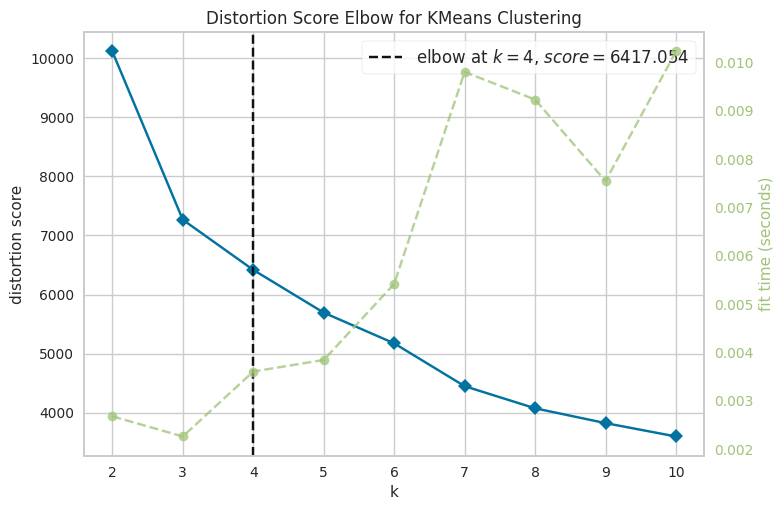

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer as KEL

plt.rcParams['font.family'] = 'DejaVu Sans'
clusters = KEL(KMeans(), k=10)
clusters.fit(pca_df)
clusters.show()

In [58]:
"""
from sklearn.cluster import AgglomerativeClustering

method = AgglomerativeClustering(n_clusters=4)

model = method.fit_predict(pca_df)

pca_df["Cluster"] = model
df["Cluster"]= model

"""

'\nfrom sklearn.cluster import AgglomerativeClustering\n\nmethod = AgglomerativeClustering(n_clusters=4)\n\nmodel = method.fit_predict(pca_df)\n\npca_df["Cluster"] = model\ndf["Cluster"]= model\n\n'

In [59]:
nc = 4

kmeans = KMeans(n_clusters=nc, init='k-means++', random_state=0)

y_kmeans = kmeans.fit_predict(pca_df)

pca_df["Cluster"] = y_kmeans
df["Cluster"] = y_kmeans

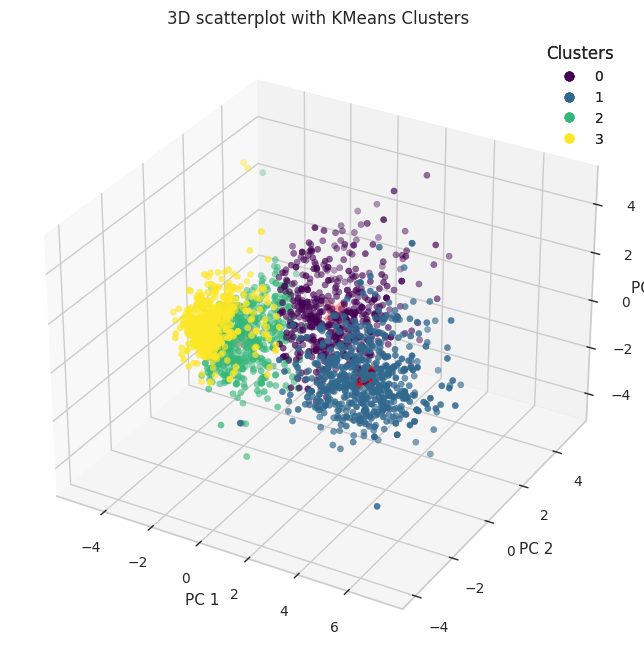

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


fig = plt.figure(figsize=(30, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(pca_df['col1'], pca_df['col2'], pca_df['col3'], c=y_kmeans, cmap='viridis', label='Cluster')


ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=300, c='red', marker='X', label='Centroids')


ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D scatterplot with KMeans Clusters')


legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)


plt.show()

### **Interpretation of the Results**

How to interpret each principal component is an essential part of the analysis. Interpretation involves understanding what characteristics or patterns in the data are being represented by each principal component. This can be done by examining the "loadings" of the original variables in each principal component

The loadings indicate the contribution of each original variable to the formation of each principal component

In [61]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=["Component1", "Component2", "Component3"], index=data_scl.columns)


print("Loadings of the variables in each main component:")
print(loadings_df)

Loadings of the variables in each main component:
                        Component1  Component2  Component3
Incomescl                 0.278858    0.067669   -0.199114
Recencyscl                0.005789    0.001693   -0.013104
MntWinesscl               0.296162    0.245835   -0.124764
MntFruitsscl              0.269864   -0.133224    0.183724
MntMeatProductsscl        0.313954   -0.092642   -0.062524
MntFishProductsscl        0.279585   -0.147512    0.180162
MntSweetProductsscl       0.267755   -0.117498    0.201467
MntGoldProdsscl           0.219338    0.105316    0.313182
NumDealsPurchasesscl     -0.050084    0.555047    0.300252
NumWebPurchasesscl        0.205632    0.406731    0.194606
NumCatalogPurchasesscl    0.313499    0.042171   -0.063360
NumStorePurchasesscl      0.280816    0.185073    0.012625
NumWebVisitsMonthscl     -0.243029    0.269245    0.281416
Agescl                    0.049691    0.270539   -0.379940
Childrenscl              -0.221325    0.361307    0.053408
Spents

In [62]:
pca_df.head()

,col1,col2,col3,Cluster
0,4.250210,0.257121,1.113207,1
1,-2.520446,-0.140969,-0.865050,2
2,1.900423,-0.288726,-0.063051,1
3,-2.414452,-1.053368,0.310359,3
4,-0.143444,0.802943,-0.015106,0


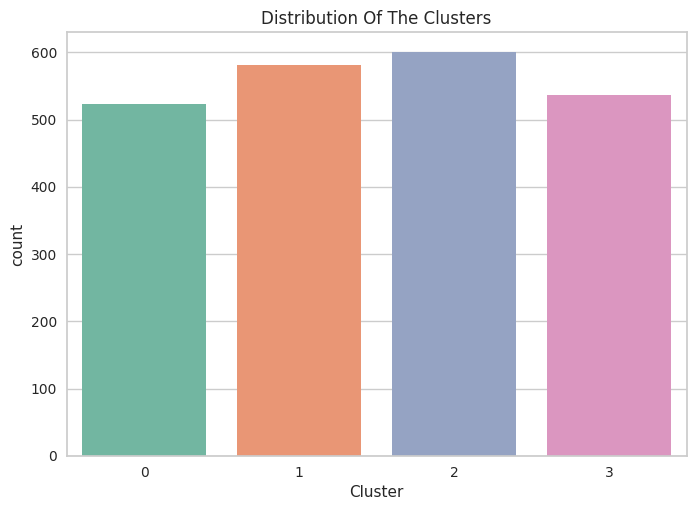

In [63]:
colors = sns.color_palette("Set2")

pl = sns.countplot(x=pca_df["Cluster"], palette=colors)
pl.set_title("Distribution Of The Clusters")
plt.show()

- Purchasing Habits

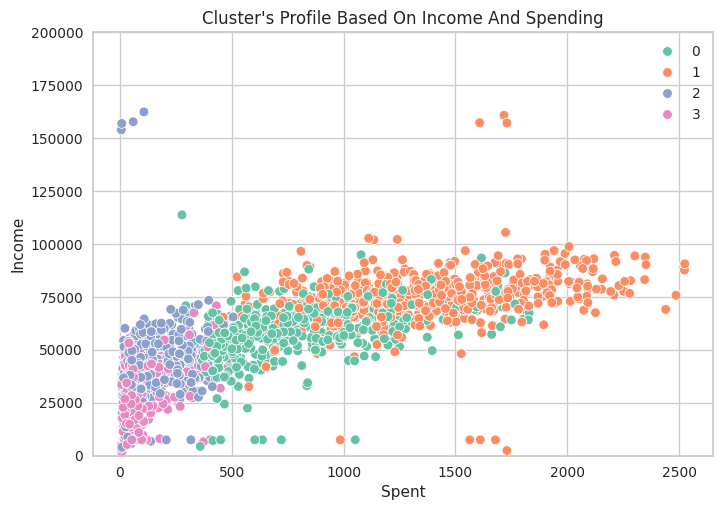

In [64]:
pl = sns.scatterplot(data = df, x = df["Spent"], y = df["Income"], hue = df["Cluster"], palette= colors)
pl.set_ylim(0, 200000)

pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

- Cluster 0: average income and average consumption

- Cluster 1: high income and high consumption
- Cluster 2: average income and low consumption
- Cluster 3: low income and low consumption

In [65]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Spent,Cluster
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,67,0,1617,1
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,70,2,27,2
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,59,0,776,1
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,40,1,53,3
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,43,1,422,0


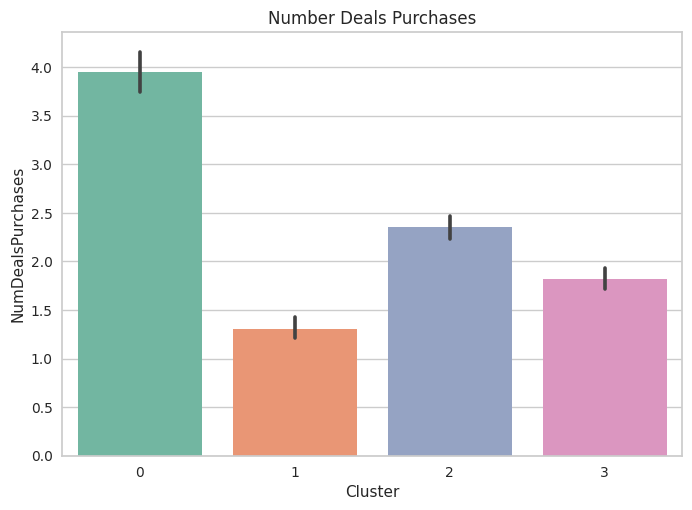

In [66]:
pl = sns.barplot(y = df["NumDealsPurchases"], x = df["Cluster"], palette = colors)
pl.set_title("Number Deals Purchases")
plt.show()

The offers offered worked well for **group 0 and group 2**

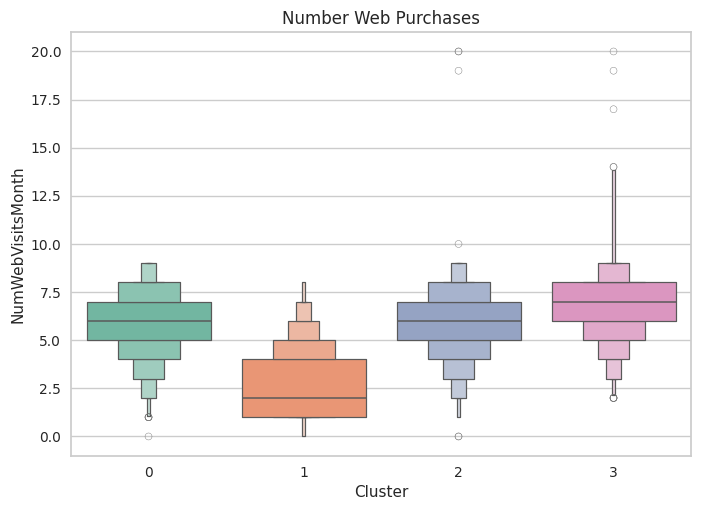

In [67]:
pl = sns.boxenplot(y = df["NumWebVisitsMonth"], x = df["Cluster"], palette = colors)
pl.set_title("Number Web Purchases")
plt.show()

Although our group 2 and 3 are the lowest spenders, they are the ones who have visited the company's website the most in the last month. **Perhaps they are looking for better prices or specific products**

- Personal Characteristics

In [68]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Spent,Cluster
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,67,0,1617,1
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,70,2,27,2
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,59,0,776,1
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,40,1,53,3
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,43,1,422,0


<Figure size 2000x1500 with 0 Axes>

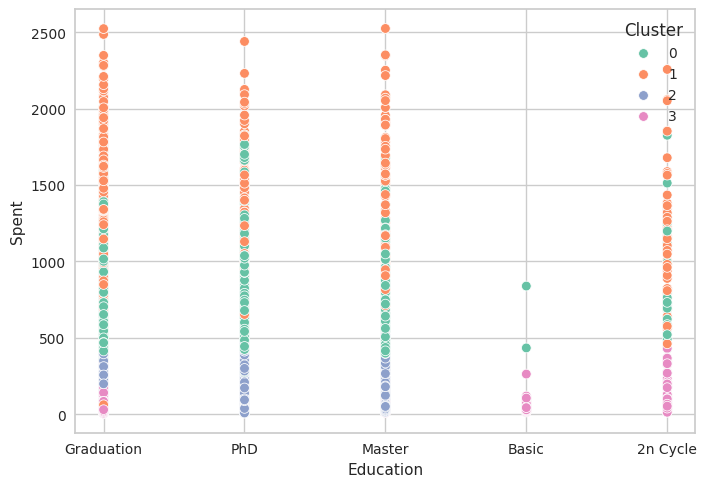

<Figure size 2000x1500 with 0 Axes>

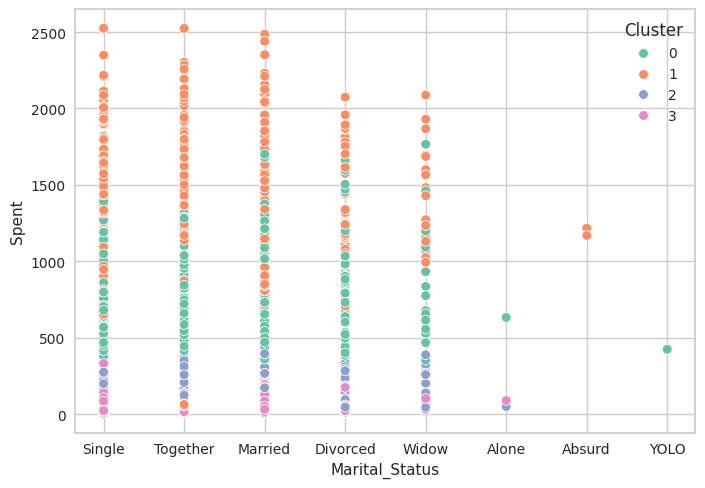

<Figure size 2000x1500 with 0 Axes>

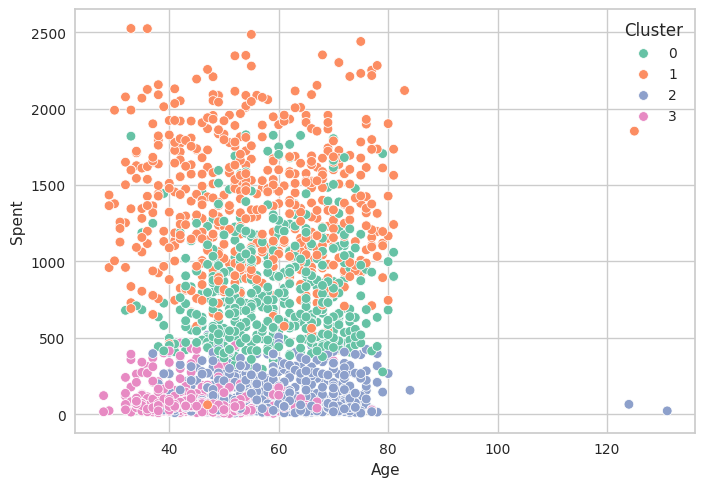

<Figure size 2000x1500 with 0 Axes>

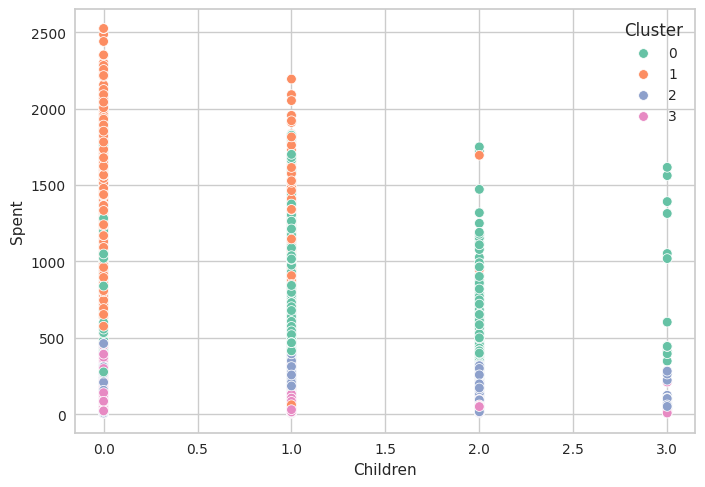

In [69]:
characteristics = [ "Education","Marital_Status","Age", "Children"]

for i in characteristics:
    plt.figure(figsize=(20, 15))
    plt.figure()
    sns.scatterplot(x = df[i], y = df["Spent"], hue = df["Cluster"],  palette = colors)
    plt.show()

## -------------------